In [1]:
import pandas as pd
import numpy as np

In [2]:
heart=pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart['age']=np.where(heart['age']<=40,1,
                       np.where(heart['age']<=60,2,3))
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,3,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,2,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,2,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart['output'].value_counts(
)

1    165
0    138
Name: output, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
y_heart=heart['output']
x_heart=heart.drop('output',axis=1)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x_heart,y_heart,test_size=0.2)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(x_train,y_train)
lr_pred=lr_clf.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8032786885245902


오차행렬

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_test,lr_pred)

array([[23,  7],
       [ 5, 26]], dtype=int64)

정밀도와 재현율

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score

In [17]:
print(precision_score(y_test,lr_pred))

0.7878787878787878


In [18]:
print(recall_score(y_test,lr_pred))

0.8387096774193549


정밀도/재현율 트레이드 오프

F1스코어

In [19]:
from sklearn.metrics import f1_score

In [20]:
print(f1_score(y_test,lr_pred))

0.8125


ROC곡선과 AUC

In [21]:
pred_prob=lr_clf.predict_proba(x_test)[:,1]

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
print(roc_auc_score(y_test,pred_prob))

0.8634408602150537


결정트리

In [24]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


In [25]:
heart_dt=DecisionTreeClassifier(random_state=42)
heart_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
from sklearn.tree import export_graphviz
export_graphviz(heart_dt, out_file="tree"
                
                , impurity=True,filled=True)

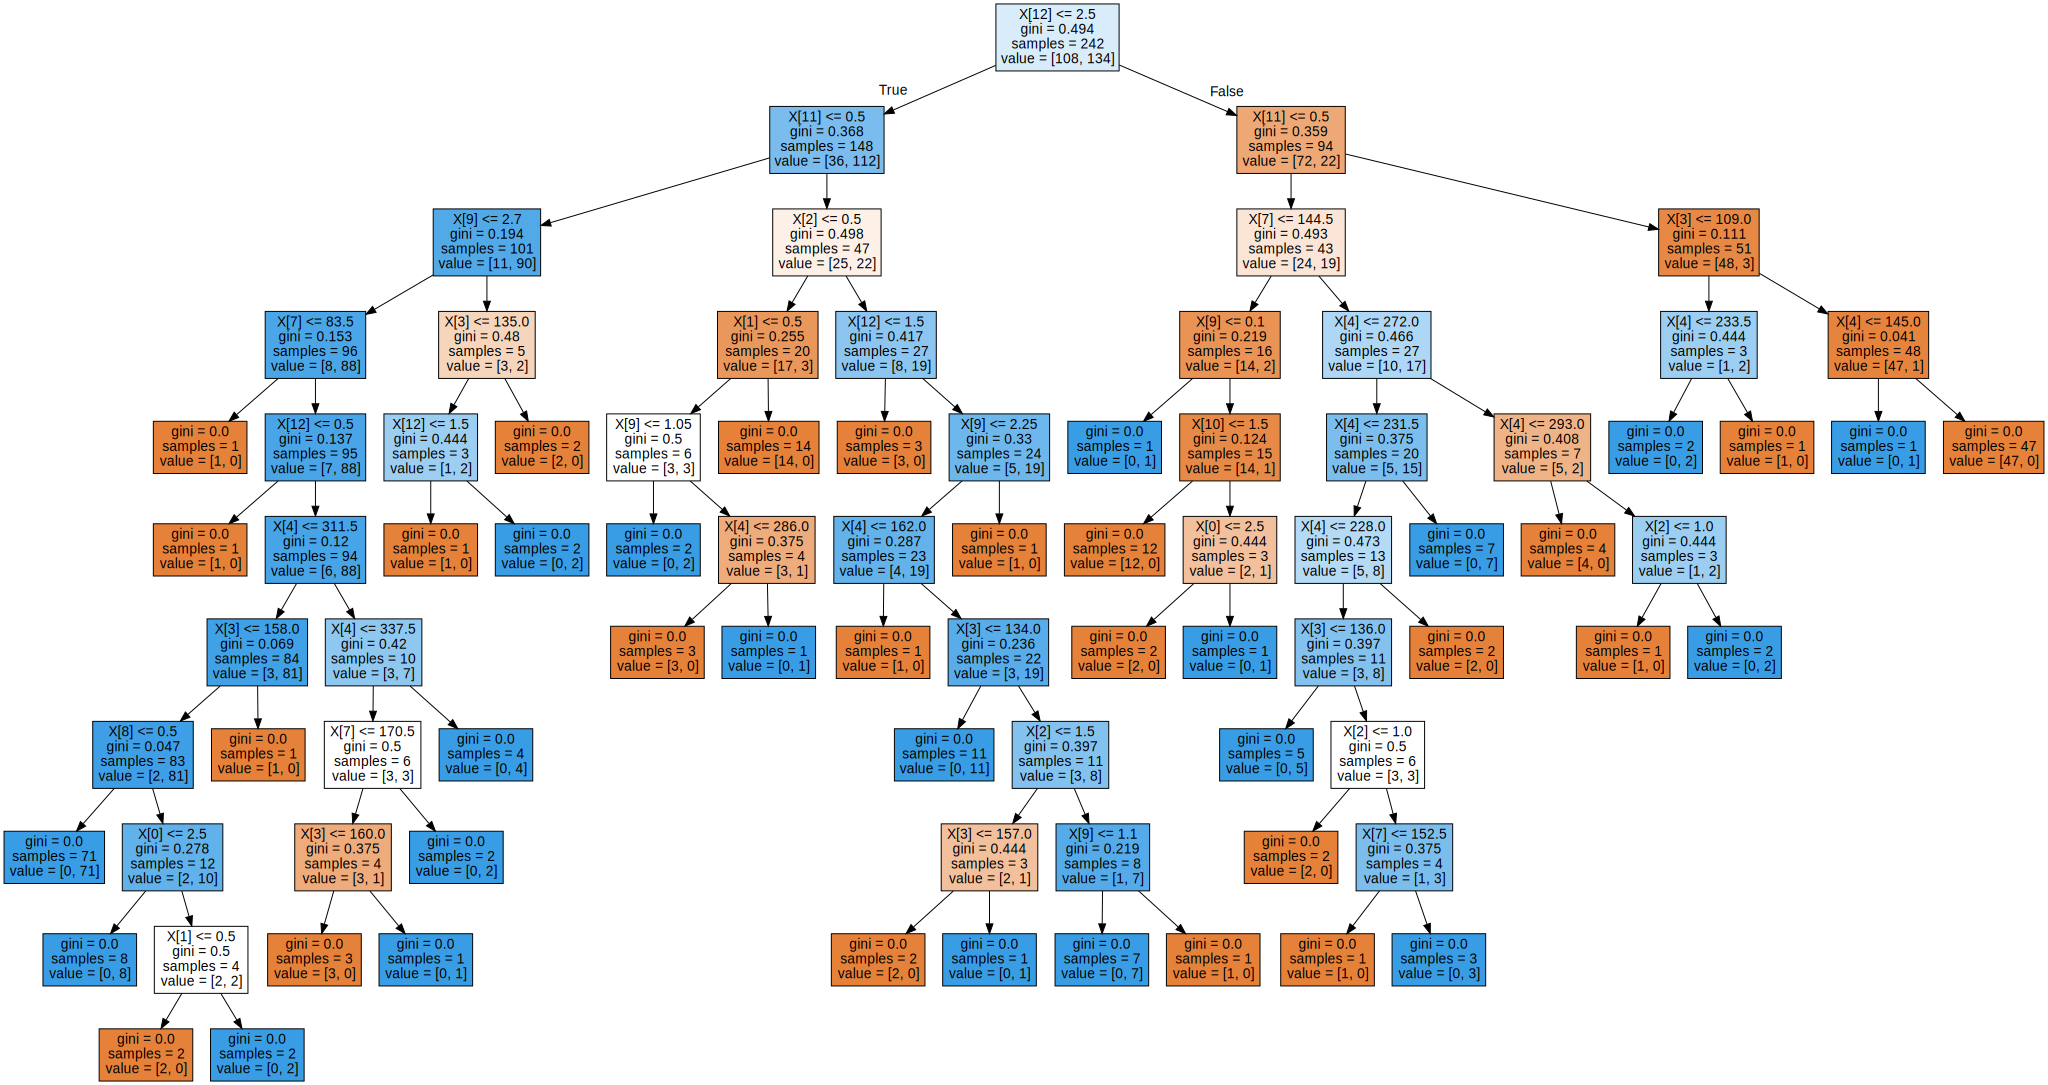

In [27]:
import graphviz 
with open("tree")as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [28]:
import seaborn as sns
%matpoltlib inline
print(format(np.round(heart_dt.feature_importances_,3)))



UsageError: Line magic function `%matpoltlib` not found.


In [ ]:
dtpred=heart_dt.predict(x_test)
print(accuracy_score(y_test,dtpred))

In [ ]:
from sklearn.model_selection import GridSearchCV
params={
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split':[16]
}
grid_cv=GridSearchCV(heart_dt,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(x_train,y_train)
print('GridSearchCV촤고정확도수치:{0:.4f}'.format(grid_cv.best_score_))


In [ ]:
print('GridSearchCV최적하이퍼파라미터:'.format(grid_cv.best_params_))


In [ ]:
cv_df=pd.DataFrame(grid_cv.cv_results_)
cv_df[['param_max_depth','mean_test_score']]

In [ ]:
max_depths=[6,8,10,12,16,20,24]
for depth in max_depths:
    heart_dt_n=DecisionTreeClassifier(max_depth=depth,min_samples_split=16,random_state=42)
    heart_dt_n.fit(x_train,y_train)
    pred_dt=heart_dt_n.predict(x_test)
    accuracy=accuracy_score(y_test,pred_dt)
    print('max_depth={0}정확도:{1:.4f}'.format(depth,accuracy))

In [ ]:
import seaborn as sns
best_cl=grid_cv.best_estimator_
pred1=best_cl.predict(x_test)
impor=best_cl.feature_importances_
impor1=pd.Series(impor,index=x_train.columns)
impor2=impor1.sort_values(ascending=False)
sns.barplot(x=impor2,y=impor2.index)

